In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

Data Extraction

In [7]:
# path = 'C:\\IML-Assignment1\\1_Data\\1_Data\\group2\\classification\\linearlySeparabel\\class1_train.txt'
directoryPath = '1_Data\\1_Data\\group2\\classification\\linearlySeparable'

In [8]:
df = pd.DataFrame(columns=['col1','col2','className'])
df_test = pd.DataFrame(columns=['col1','col2','className'])


#merge all the training df related with the linearly separable into one
for i in range(1,5):
    filePath = directoryPath + '\\class' + str(i) + '_train.txt'
    with open(filePath,'r') as file:
        data = file.readlines()
        for line in data:
            row = line.split()
            row.append(i)
            df.loc[len(df)] = row 
for i in range(1,5):
    filePath = directoryPath + '\\class' + str(i) + '_test.txt'
    with open(filePath,'r') as file:
        data = file.readlines()
        for line in data:
            row = line.split()
            row.append(i)
            df_test.loc[len(df_test)] = row 

In [9]:
df['col1'] = df['col1'].astype('float')
df['col2'] = df['col2'].astype('float')
df_test['col1'] = df_test['col1'].astype('float')
df_test['col2'] = df_test['col2'].astype('float')

In [10]:
df.head()

,col1,col2,className
0,3.089700,-1.46600,1
1,0.000538,-0.29346,1
2,-5.461700,3.47510,1
3,-0.858090,-0.31362,1
4,-0.719010,-0.87089,1


In [11]:
df.className.value_counts()

1    250
2    250
3    250
4    250
Name: className, dtype: int64

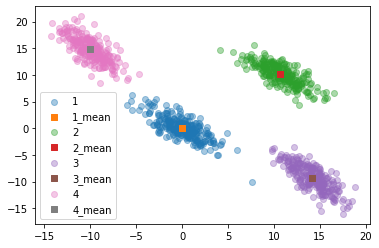

In [12]:
def data_plot(df):
    groups = df.groupby('className')

    for name, group in groups:
        plt.scatter(group.col1, group.col2, marker='o', label=name, alpha=0.4)
        mean_label = str(name) + '_mean'
        plt.scatter(x = group.col1.mean(), y = group.col2.mean(), marker='s', label = mean_label, alpha=1)
    plt.legend()
    plt.show()

data_plot(df)

In [94]:
nn_classifier = KNeighborsClassifier(n_neighbors = 1)

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

nn_classifier.fit(X, y)
y_pred = nn_classifier.predict(df_test.iloc[:,:-1])
#predict the accuracy of the prediction
from sklearn.metrics import accuracy_score
accuracy_score(df_test.iloc[:,-1], y_pred)

1.0

# Decision Boundary Plot

In [101]:
#defining the boundaries of the domain
def decision_plot(df, classifier, title = "Training Data"):   
    min1, max1 = df.iloc[:,0].min()-1, df.iloc[:,0].max()+1
    min2, max2 = df.iloc[:,1].min()-1, df.iloc[:,1].max()+1
    # print(min1,max1,min2,max2)
    #define all the range
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    xx, yy = np.meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()

    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    yhat = classifier.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contour(xx, yy, zz, colors='k')
    plt.contourf(xx, yy, zz, cmap='coolwarm', alpha=0.5)
    groups = df.groupby('className')
    for name, group in groups:
        plt.scatter(group.col1, group.col2, marker='o', label=name, alpha=0.4)
    plt.title(title)
    plt.legend()
    plt.show()

c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


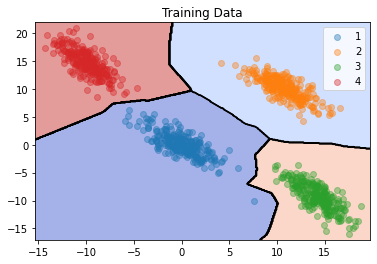

In [102]:
#Decision Plot of all training data imposed
decision_plot(df, nn_classifier, title = "Training Data")

c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


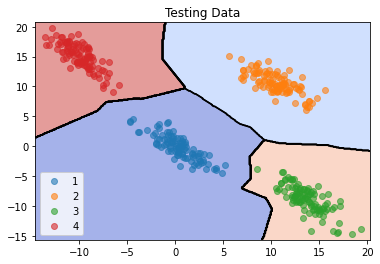

In [15]:
#Decision Plot of all the testing data superimposed
decision_plot(df_test, nn_classifier, "Testing Data")

c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


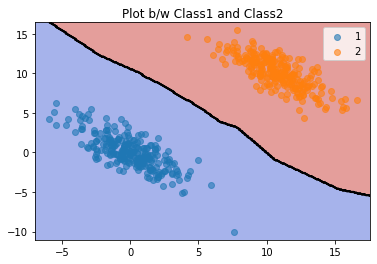

c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


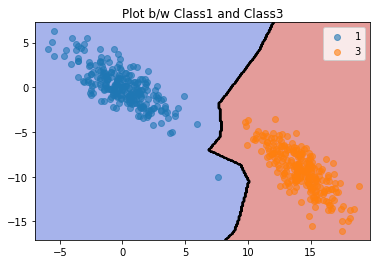

c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


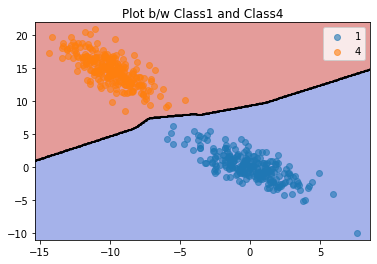

c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


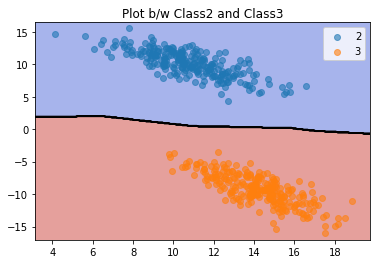

c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


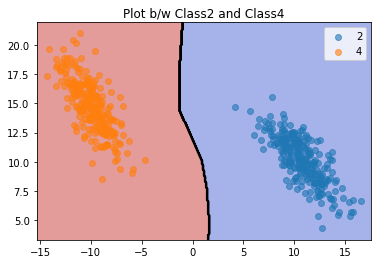

c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


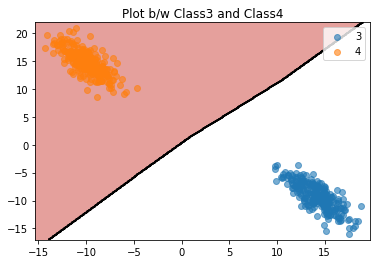

In [16]:
#Pair wise plots
from itertools import combinations

pairs = list(combinations(df.className.unique(), 2))

for i in pairs:
    dataframe = df[(df.className == i[0]) | (df.className == i[1])]
    pairwise_classifier = KNeighborsClassifier(n_neighbors=1)

    X = dataframe.iloc[:,:-1]
    y = dataframe.iloc[:, -1]

    pairwise_classifier.fit(X, y)
    decision_plot(dataframe, pairwise_classifier, title = f"Plot b/w Class{i[0]} and Class{i[1]}")

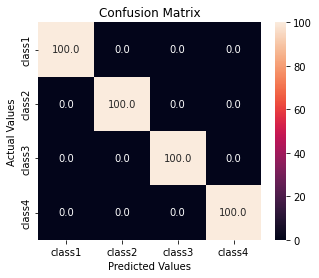

In [17]:
#Plot of the confusion matrix
'''Classification accuracy,  precision  for  every  class,  mean  precision,  recall  for  every 
class, mean recall, F-measure for every class and mean F-measure on test data'''
def plot_confusion_matrix(df_test, y_pred):
    cm = confusion_matrix(df_test.iloc[:,-1].values,y_pred)
    cm_df = pd.DataFrame(cm, index = ['class1','class2','class3','class4'],  columns = ['class1','class2','class3','class4'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, fmt='.1f', annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

plot_confusion_matrix(df_test, y_pred)

In [18]:
def plot_mean_matrix(df_test, y_pred):
    table_df = pd.DataFrame(index=['Accuracy Score','Mean Precision','Mean Recall','Mean F1'], 
                        columns=['Value'])

    y_true = df_test.iloc[:, -1].values

    accuracy = accuracy_score(y_true, y_pred)
    table_df.loc['Accuracy Score', 'Value'] = accuracy

    mean_precision = precision_score(y_true, y_pred, average='macro')
    table_df.loc['Mean Precision', 'Value'] = mean_precision

    mean_recall = recall_score(y_true, y_pred, average='macro')
    table_df.loc['Mean Recall', 'Value'] = mean_recall

    mean_f1 = f1_score(y_true, y_pred, average='macro')
    table_df.loc['Mean F1', 'Value'] = mean_f1
    
    table_df['Index'] = table_df.index
    table_df = table_df[['Index','Value']]
    fig, ax = plt.subplots(figsize=(4, 3))
    table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center',colLoc='center',rowLoc='center',)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5) 
    
    ax.axis('off') 
    plt.title('Summary', fontsize=14)
    plt.show()

In [19]:
def plot_metric_summary(df_test, y_pred):
    table_df = pd.DataFrame(columns=['Class1','Class2','Class3','Class4'], 
                        index=['Precision','Recall', 'F1 Score'])
    y_true = df_test.iloc[:, -1].values

    precision_per_class = precision_score(y_true, y_pred, average=None)
    for i, precision in enumerate(precision_per_class):
        table_df.loc['Precision', f'Class{i+1}'] = precision

    recall_per_class = recall_score(y_true, y_pred, average=None)
    for i, recall in enumerate(recall_per_class):
        table_df.loc['Recall', f'Class{i+1}'] = recall

    f1_per_class = f1_score(y_true, y_pred, average=None)
    for i, f1 in enumerate(f1_per_class):
        table_df.loc['F1 Score', f'Class{i+1}'] = f1    
     
    table_df['Index'] = table_df.index
    table_df = table_df[['Index','Class1','Class2','Class3']]
    fig, ax = plt.subplots(figsize=(4, 3))
    table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center',colLoc='center',rowLoc='center',)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5) 
    
    ax.axis('off') 
    plt.title('Summary', fontsize=14)
    plt.show()

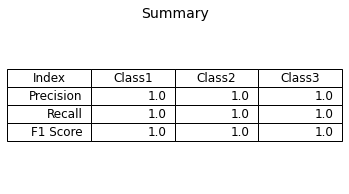

In [20]:
plot_metric_summary(df_test, y_pred)

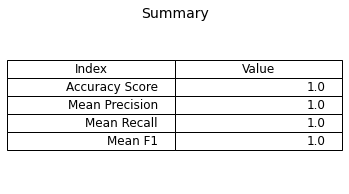

In [21]:
plot_mean_matrix(df_test, y_pred)

# KNN

Optimal k value: 1


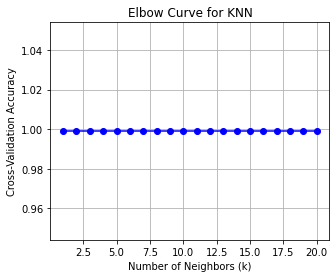

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

k_values = range(1, 21)  

cross_validation_score = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  
    cross_validation_score.append(scores.mean())


plt.figure(figsize=(5, 4))
plt.plot(k_values, cross_validation_score, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)

# Find the optimal k value (the one with the highest accuracy)
optimal_k = k_values[np.argmax(cross_validation_score)]
print(f'Optimal k value: {optimal_k}')

plt.show()


The optimum value of K = 1
which is nothing but the nearest neighbour classifier done earlier.

# Reference template Classifier

In [380]:
class ReferenceTemplateClassifier():
    def __init__(self):
        self.mean = []
    
    def fit(self, df):
        groups = df.groupby('className')
        for name, group in groups:
            mean_value = (group['col1'].mean(), group['col2'].mean(), name)
            self.mean.append(mean_value)
        return self.mean

    def predict(self, data_array):
        y_pred = []
        for row in data_array:
            min_distance = float('inf')
            assigned_class = None

            for mean_tuple in self.mean:
                distance = np.sqrt((row[0] - mean_tuple[0])**2 + (row[1] - mean_tuple[1])**2)
                if distance < min_distance:
                    min_distance = distance
                    assigned_class = mean_tuple[2]
            y_pred.append(assigned_class)
        return np.array(y_pred)
    

In [381]:
referenceTemplateClassifier = ReferenceTemplateClassifier()
referenceTemplateClassifier.fit(df)
test_data = df_test[['col1','col2']].to_numpy()
y_pred = referenceTemplateClassifier.predict(test_data)

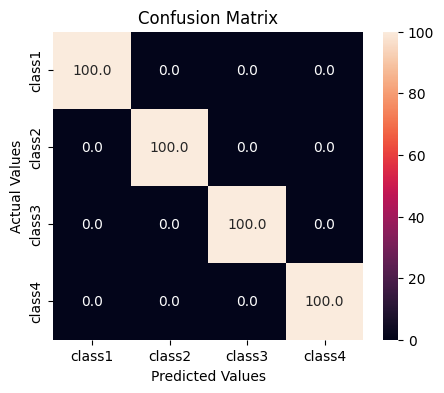

In [273]:
plot_confusion_matrix(df_test, y_pred)

-15.332 19.838 -17.046 21.998


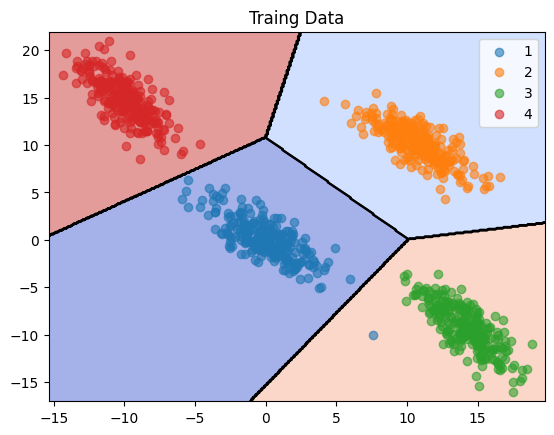

In [274]:
decision_plot(df, referenceTemplateClassifier)

Testing Data Plot with decision boundary 

-14.597 20.333 -15.667 20.738


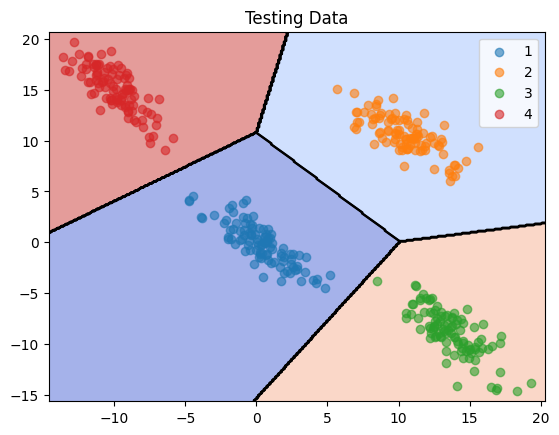

In [275]:
decision_plot(df_test, referenceTemplateClassifier, title = "Testing Data")

In [276]:
# Pairwise Plots using reference templates

-6.9493 17.594 -11.044 16.523


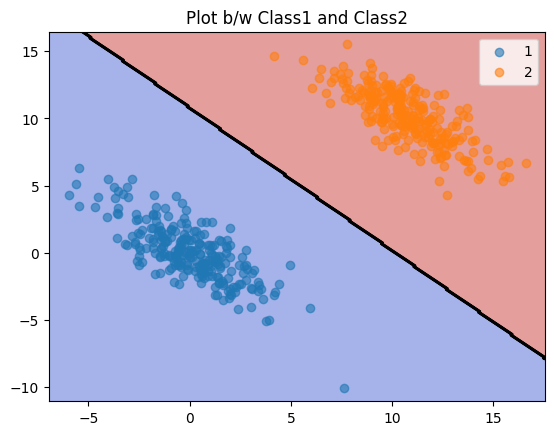

-6.9493 19.838 -17.046 7.2783


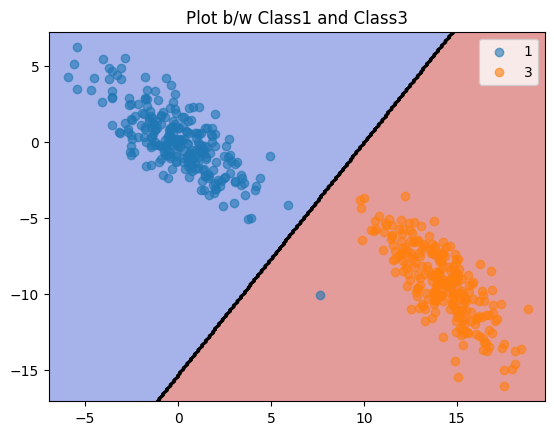

-15.332 8.6207 -11.044 21.998


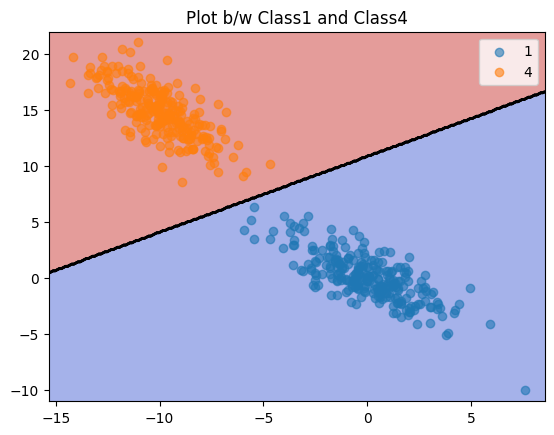

3.1527000000000003 19.838 -17.046 16.523


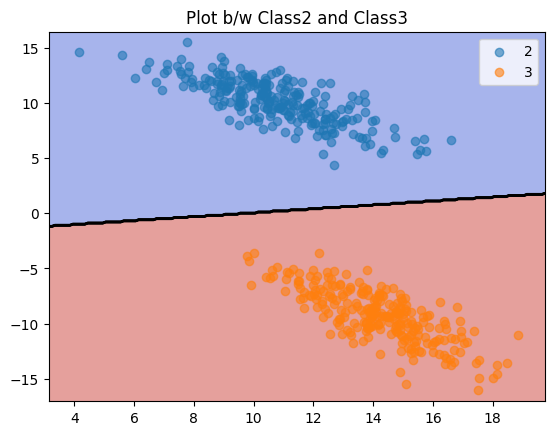

-15.332 17.594 3.3335 21.998


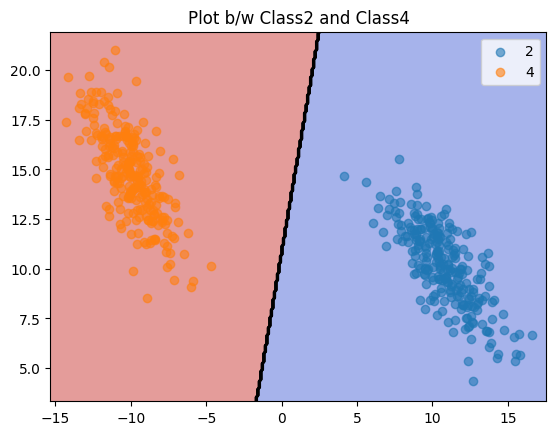

-15.332 19.838 -17.046 21.998


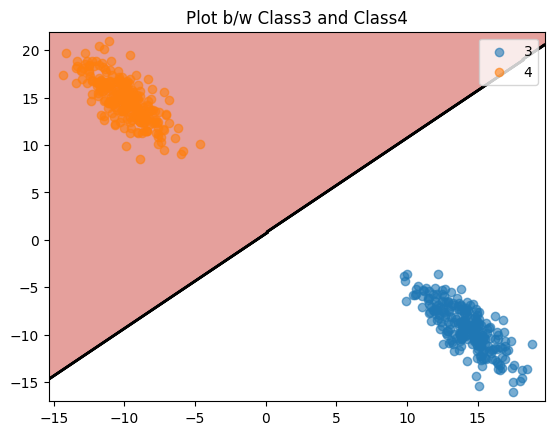

In [277]:
from itertools import combinations

pairs = list(combinations(df.className.unique(), 2))

for i in pairs:
    dataframe = df[(df.className == i[0]) | (df.className == i[1])]
    pairwise_classifier = ReferenceTemplateClassifier()

    pairwise_classifier.fit(dataframe)
    decision_plot(dataframe, pairwise_classifier, title = f"Plot b/w Class{i[0]} and Class{i[1]}")

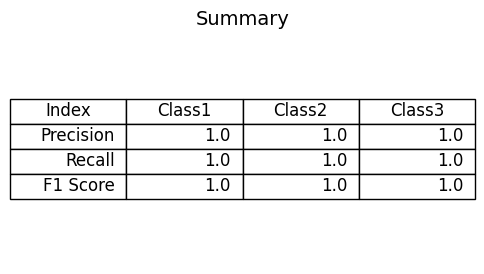

In [278]:
plot_metric_summary(df_test, y_pred)

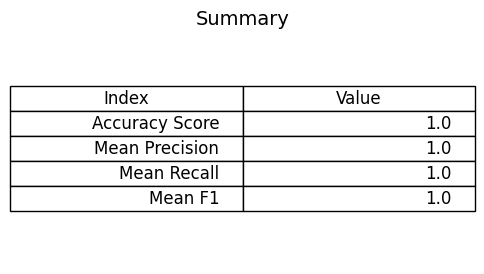

In [279]:
plot_mean_matrix(df_test, y_pred)

# Reference template with mean vector and covariance

In [398]:
class ReferenceTemplateClassifier_Mahalodian():
    def __init__(self):
        self.mean = {}
        self.covariance = {}
        self.className = []
    
    def fit(self, df):
        groups = df.groupby('className')
        self.className = df.className.unique()
        for name, group in groups:
            self.mean[name] = group[['col1','col2']].mean().to_numpy()
            self.covariance[name] = group[['col1','col2']].cov().to_numpy()
        
    
    def predict(self, data_array):
        y_pred = []
        for row in data_array:
            min_distance = float('inf')
            assigned_class = None

            for name in self.className:
                distance = np.sqrt(
                    np.dot(np.dot((row - self.mean[name]).T, np.linalg.inv(self.covariance[name])), (row - self.mean[name]))
                )
                if distance < min_distance:
                    min_distance = distance
                    assigned_class = name
            y_pred.append(assigned_class)
        return np.array(y_pred)
    

In [393]:
rtc = ReferenceTemplateClassifier_Mahalodian()
rtc.fit(df)
test_data = df_test[['col1','col2']].to_numpy()
y_pred = rtc.predict(test_data)

Decision Plot with training data

-15.332 19.838 -17.046 21.998


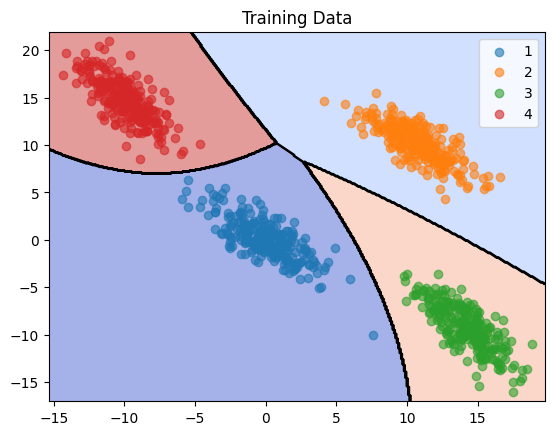

In [395]:
decision_plot(df, rtc, title="Training Data")

-14.597 20.333 -15.667 20.738


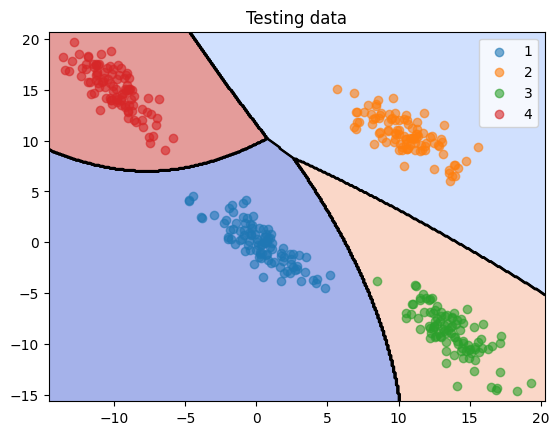

In [396]:
decision_plot(df_test, rtc, title="Testing data")

-6.9493 17.594 -11.044 16.523


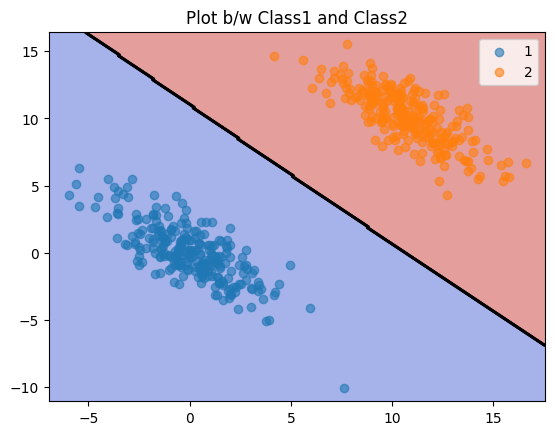

-6.9493 19.838 -17.046 7.2783


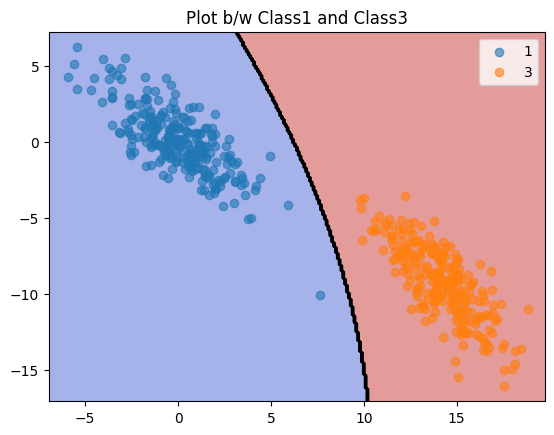

-15.332 8.6207 -11.044 21.998


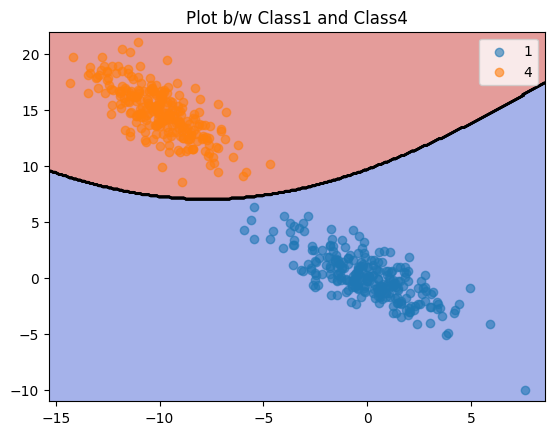

3.1527000000000003 19.838 -17.046 16.523


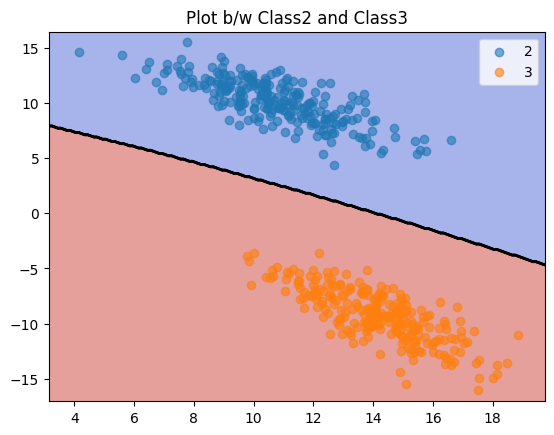

-15.332 17.594 3.3335 21.998


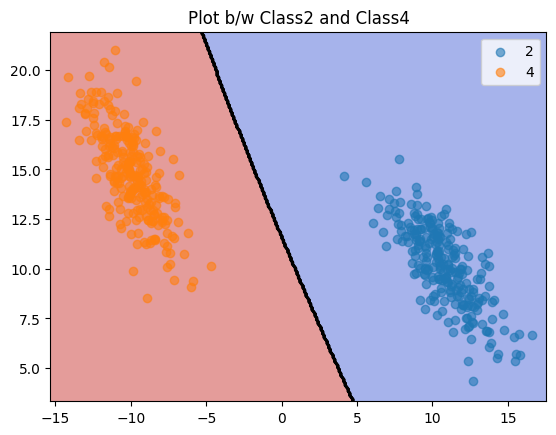

-15.332 19.838 -17.046 21.998


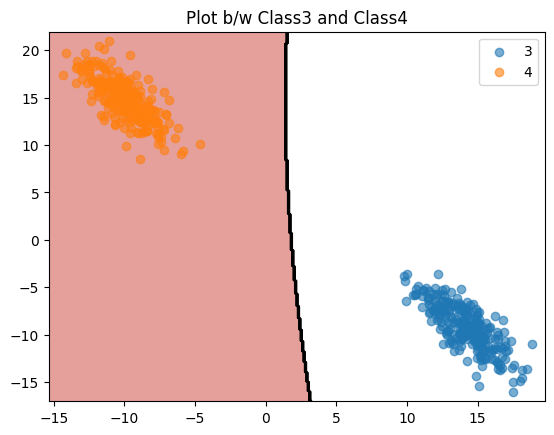

In [399]:
pairs = list(combinations(df.className.unique(), 2))

for i in pairs:
    dataframe = df[(df.className == i[0]) | (df.className == i[1])]
    pairwise_classifier = ReferenceTemplateClassifier_Mahalodian()

    pairwise_classifier.fit(dataframe)
    decision_plot(dataframe, pairwise_classifier, title = f"Plot b/w Class{i[0]} and Class{i[1]}")

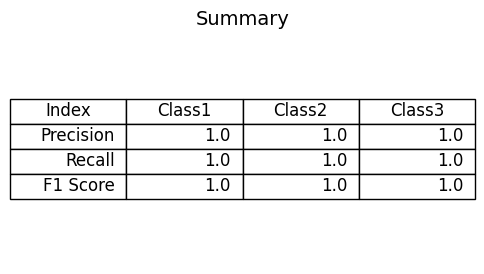

In [400]:
plot_metric_summary(df_test, y_pred)

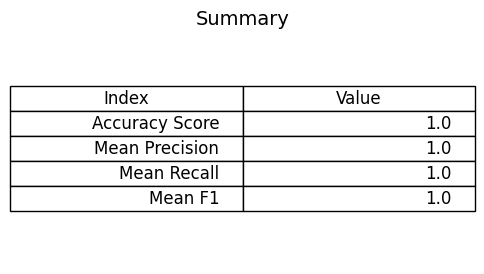

In [401]:
plot_mean_matrix(df_test, y_pred)

### Bayes Classifier- Unimodal Gaussian Density

In [90]:
from scipy.stats import multivariate_normal

class BivariateBayesClassifier():
    def __init__(self):
        self.classes = []
        self.class_parameters = {}

    def fit(self,df,covarianceNature,diagonals,uniformCovarianceType='classwise'):
        """
            Fit the classifier to the data.

            Args:
                df (DataFrame): The input dataframe with features and class labels.
                covarianceNature (str): The nature of covariance matrices.
                    - 'same': All classes share the same covariance matrix.
                    - 'different': Each class has a different covariance matrix.
                diagonals (str): The type of covariance matrix diagonalization.
                    - 'diagonal': Diagonal covariance matrix.
                    - 'full': Full covariance matrix.
                uniformCovarianceType (str, optional): The type of covariance matrix uniformity.
                    - 'classwise': Covariance matrices obtained by taking average of convariance matriced of all the classes.
                    - 'entire': Covariance matrices obtained by taking average of entire training data of all the classes combined.

            Returns:
                None
        """
         
        self.classes = df['className'].unique()
        self.class_parameters = {}

        # covarianceNature = ['same','different']
        # diagonals = ['full','diagonal']
        class_covariances = []
        for c in self.classes:
            class_df = df[df['className']==c]
            class_covariances.append(self.covariance(class_df))

        for c in self.classes:
            class_df = df[df['className'] == c]
            class_mean = class_df[['col1', 'col2']].mean().values

            class_covariance = np.zeros((2,2))
            if covarianceNature == 'same':
                if uniformCovarianceType == 'classwise':
                    class_covariance =  np.mean(class_covariances,axis=0)
                elif uniformCovarianceType == 'entire':
                    class_covariance = self.covariance(df)
            elif covarianceNature == 'different':
                class_covariance = class_covariances[c-1]
            
            if diagonals == 'diagonal':
                class_covariance = self.diagonalize(class_covariance)

            
            self.class_parameters[c] = {
                'mean': class_mean,
                'covariance': class_covariance,
                'prior': len(class_df) / len(df)
            }
        
    
    def covariance(self,df):
        return df[['col1','col2']].cov().values
    
    def diagonalize(self,cov_matrix):
        cov_matrix = np.array(cov_matrix)
        return cov_matrix * np.identity(cov_matrix.shape[0])
    
    def predict(self,x):
        predicted_classes = []

        for dataPoint in x:
            posteriors = []
            for c in self.classes:
                class_params = self.class_parameters[c]
                prior = class_params['prior']
                mean = class_params['mean']
                covariance = class_params['covariance']
                
                mvn = multivariate_normal(mean=mean, cov=covariance)
                posterior = prior * mvn.pdf(dataPoint)
                posteriors.append(posterior)

            predicted_class = self.classes[np.argmax(posteriors)]
            predicted_classes.append(predicted_class)
        return np.array(predicted_classes)
    

bbc = BivariateBayesClassifier()

a. Covariance matrix for all the classes is the same and is σ2I 
    i. You  can  obtain  the  same  covariance  matrix  for  all  the  classes  by  taking the average of covariance matrices of all the classes. You can obtain  same  variance by averaging all the variances. 

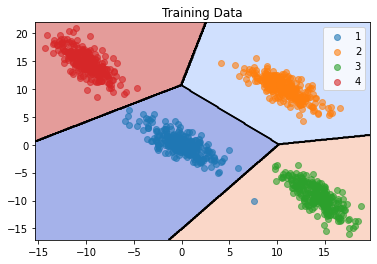

In [85]:
bbc.fit(df,'same','diagonal','entire')
decision_plot(df, bbc, title="Training Data")

b.  Full covariance matrix for all the classes and is same for all the classes 
    i. Same  covariance  matrix  for  all  the  classes  may  be  obtained  by  taking average of covariance matrices of all the classes

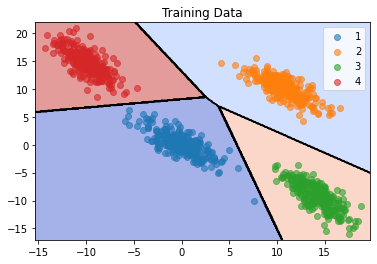

In [86]:
bbc.fit(df,'same','full','classwise')
decision_plot(df, bbc, title="Training Data")

b.  Full covariance matrix for all the classes and is same for all the classes
    ii. Same covariance matrix for all the classes by computing the covariance matrix of training data of all the classes combined.

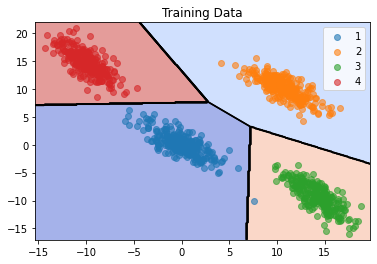

In [87]:
bbc.fit(df,'same','full','entire')
decision_plot(df, bbc, title="Training Data")

c.  Covariance matrix is diagonal and is different for each class

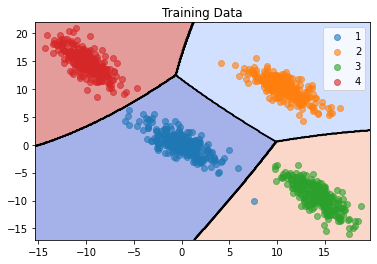

In [91]:
bbc.fit(df,'different','diagonal')
decision_plot(df, bbc, title="Training Data")

d.  Full covariance matrix for each class and is different 

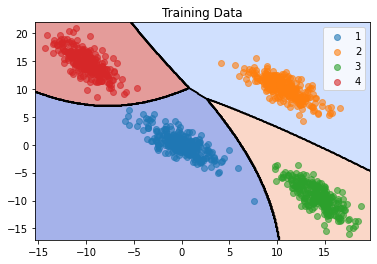

In [92]:
bbc.fit(df,'different','full')
decision_plot(df, bbc, title="Training Data")